In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis,shapiro
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('Iris_Data.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [114]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [115]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [116]:
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
print(X,Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [117]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


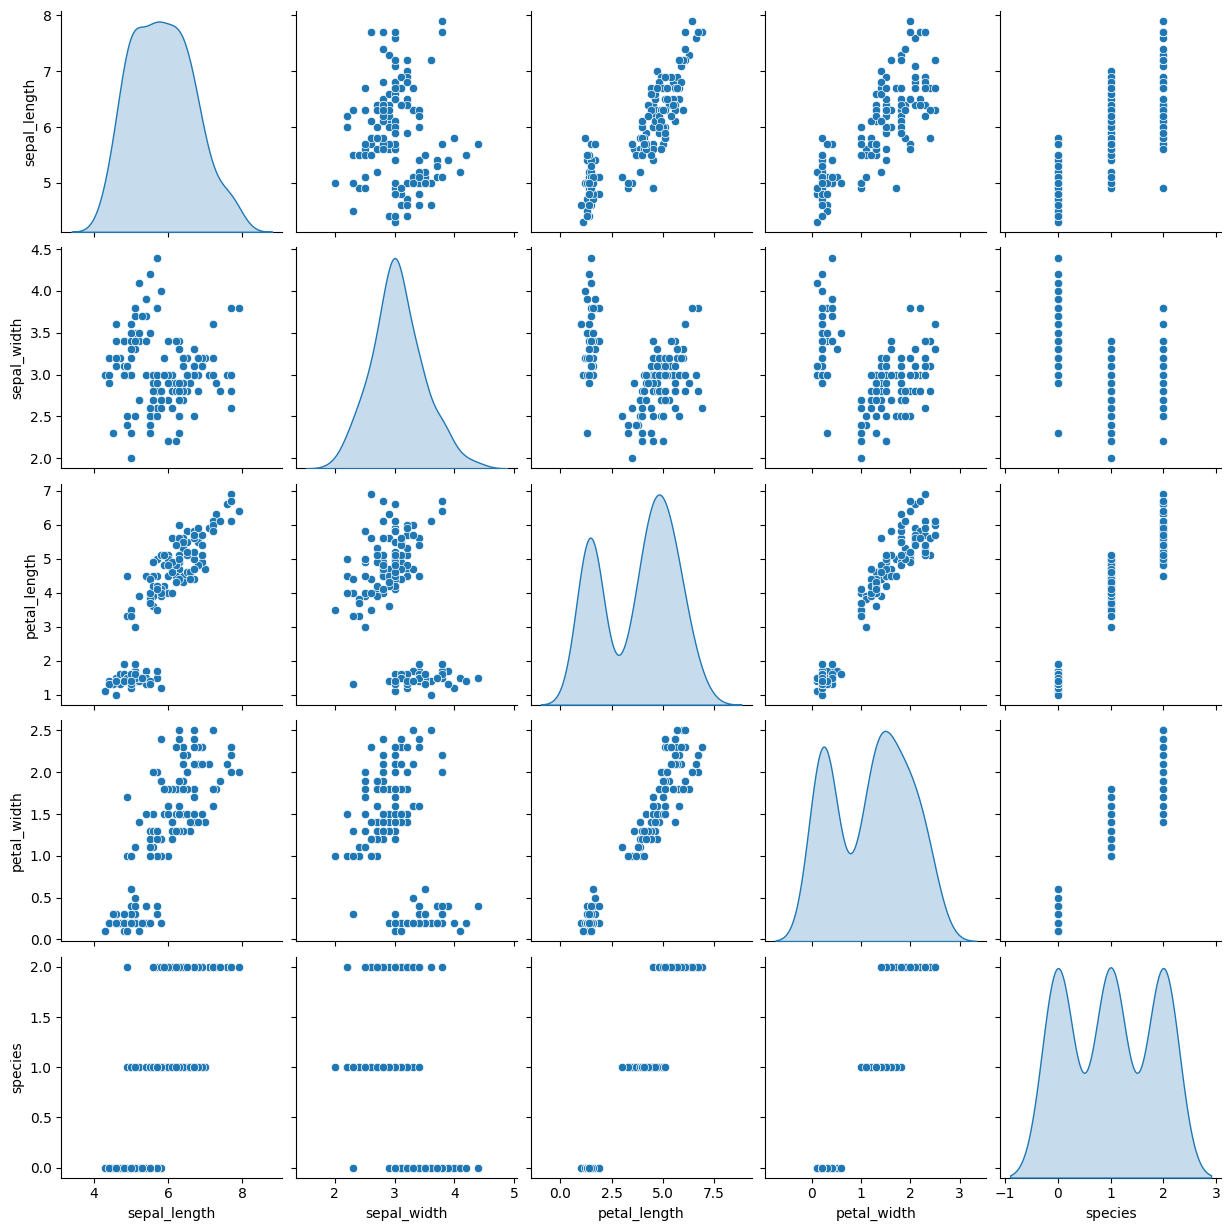

In [118]:
sns.pairplot(df, diag_kind='kde')

In [119]:
for col in df.columns:
    
    print(f'Skewness {col}:', skew(df[col]))
    print(f'Kurtosis {col}:', kurtosis(df[col]))

Skewness sepal_length: 0.3117530585022963
Kurtosis sepal_length: -0.5735679489249765
Skewness sepal_width: 0.330702812773315
Kurtosis sepal_width: 0.24144329938318343
Skewness petal_length: -0.2717119501716388
Kurtosis petal_length: -1.3953593021397128
Skewness petal_width: -0.10394366626751729
Kurtosis petal_width: -1.3352456441311857
Skewness species: 0.0
Kurtosis species: -1.5


In [120]:
scl = StandardScaler()
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

model = GaussianNB()

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

print("accuracy of model is :",accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

accuracy of model is : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

